<a href="https://colab.research.google.com/github/willewiik/Text-Mining/blob/main/pythonscript.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/willewiik/text-mining.git
%cd "text-mining"

Cloning into 'text-mining'...
remote: Enumerating objects: 44, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 44 (delta 15), reused 24 (delta 7), pack-reused 0 (from 0)
Receiving objects: 100% (44/44), 931.68 KiB | 4.93 MiB/s, done.
Resolving deltas: 100% (15/15), done.
/content/text-mining


In [ ]:
# FROM CHATPGT, how to convert R lists.RDS to Python dict
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri

# Activate pandas conversion for data frames if needed
pandas2ri.activate()

# Load the RDS file
readRDS = ro.r['readRDS']
list_report = readRDS("combined_stats_report_list.RDS")

# Convert R list to Python list
list_report_py = list(list_report)

# If elements are R lists, convert them to Python dicts
list_report_py = [
    dict(zip(item.names, list(item))) if hasattr(item, "names") else list(item)
    for item in list_report_py
]

In [ ]:
print(type(list_report_py))
print(len(list_report_py))
print(type(list_report_py[0]))
if isinstance(list_report_py[0], dict):
    print(list_report_py[0].keys())  # List the keys of the first dictionary

for key, value in list_report_py[0].items():
    print(f"{key}: {value}")

<class 'list'>
158
<class 'dict'>
dict_keys(['hteam', 'ateam', 'starttime', 'score', 'home_players', 'away_players', 'report'])
hteam: [1] "Manchester United"

ateam: [1] "Fulham"

starttime: [1] "2024-08-16T19:00:00.000Z"

score: [1 0]
home_players:          ID                Name Position FotMob.rating Minutes.played Goals  \
1    611491         Andre Onana  Starter           8.7             90     0   
2    775539   Noussair Mazraoui  Starter           7.8             81     0   
3    255610       Harry Maguire  Starter          7.66             81     0   
4    847983   Lisandro Martinez  Starter          7.63             90     0   
5    751550         Diogo Dalot  Starter          7.68             90     0   
6    208494            Casemiro  Starter          8.01             90     0   
7   1292810       Kobbie Mainoo  Starter          7.79             84     0   
8   1070052         Amad Diallo  Starter          7.03             61     0   
9    750032         Mason Mount  Start

In [ ]:
import pandas as pd
from transformers import pipeline

# Example Data: Sentences and Players
sentences = [
    "Harry Kane scored a stunning goal in the 30th minute.",
    "Kane was a constant threat to the opposition defense.",
    "Son Heung-min played exceptionally well, providing an assist.",
    "Son's dribbling was mesmerizing throughout the match.",
    "Romero's defense was rock solid.",
    "Romero made several crucial tackles.",
    "Lloris made a crucial save to deny the opposition.",
]

player_names = {
    "Harry Kane": "Kane",
    "Son Heung-min": "Son",
    "Cristian Romero": "Romero",
    "Hugo Lloris": "Lloris",
}

# Sentiment Analysis Model
sentiment_model = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment")

# Match sentences to players
results = []

for sentence in sentences:
    for full_name, surname in player_names.items():
        if full_name in sentence or surname in sentence:
            sentiment = sentiment_model(sentence)[0]
            results.append({
                "Player": full_name,
                "Sentence": sentence,
                "Sentiment": sentiment["label"],
                "Score": sentiment["score"]
            })
            break

# Convert results to DataFrame
df = pd.DataFrame(results)

# Calculate average sentiment score for each player
average_scores = df.groupby("Player").agg(
    Average_Score=("Score", "mean"),
    Sentiment_Count=("Score", "count")
).reset_index()

# Merge average scores
detailed_with_averages = pd.merge(df, average_scores, on="Player")

print(detailed_with_averages)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

Device set to use cpu


            Player                                           Sentence  \
0       Harry Kane  Harry Kane scored a stunning goal in the 30th ...   
1       Harry Kane  Kane was a constant threat to the opposition d...   
2    Son Heung-min  Son Heung-min played exceptionally well, provi...   
3    Son Heung-min  Son's dribbling was mesmerizing throughout the...   
4  Cristian Romero                   Romero's defense was rock solid.   
5  Cristian Romero               Romero made several crucial tackles.   
6      Hugo Lloris  Lloris made a crucial save to deny the opposit...   

  Sentiment     Score  Average_Score  Sentiment_Count  
0   LABEL_2  0.949972       0.789618                2  
1   LABEL_0  0.629263       0.789618                2  
2   LABEL_2  0.953478       0.959687                2  
3   LABEL_2  0.965895       0.959687                2  
4   LABEL_2  0.887097       0.726608                2  
5   LABEL_2  0.566119       0.726608                2  
6   LABEL_1  0.646724  

In [ ]:
import re
import pandas as pd
from transformers import pipeline

# Sentiment Analysis Model
sentiment_model = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment")

# Sentiment label translation
label_translation = {
    "LABEL_0": "negative",
    "LABEL_1": "neutral",
    "LABEL_2": "positive"
}

# Sentiment to numerical score mapping
sentiment_to_score = {
    "negative": -1,
    "neutral": 0,
    "positive": 1
}

# Function to extract and aggregate sentiment for players
def extract_and_aggregate_sentiment(report, home_players, away_players):
    # Step 1: Tokenize the report into sentences
    sentences = re.split(r'(?<=[.!?]) +', report)

    # Step 2: Initialize player_sentiments dictionary, including only players
    # who played more than 9 minutes (needs minimum of 10 minutes to get a fotmob score)
    player_names = {
        player['Name']: player['Name'].split()[-1]  # Map full name to surname
        for player in home_players + away_players
        if int(player.get('Minutes.played', 0)) > 9
    }

    player_sentiments = {player: [] for player in player_names}  # Initialize aggregation structure

    # Step 3: Analyze each sentence
    for sentence in sentences:
        # Find players mentioned in the sentence
        players_in_sentence = [
            full_name for full_name, surname in player_names.items()
            if full_name in sentence or surname in sentence
        ]

        # Process the sentence if exactly one player is mentioned
        if len(players_in_sentence) == 1:
            full_name = players_in_sentence[0]  # Get the full name of the mentioned player
            sentiment = sentiment_model(sentence)[0]

            # Translate sentiment label and map to numerical score
            translated_sentiment = label_translation.get(sentiment["label"], sentiment["label"])
            sentiment_score = sentiment_to_score[translated_sentiment]

            # Append sentiment score to the players list
            player_sentiments[full_name].append(sentiment_score)

    # Step 4: Aggregate sentiments for each player
    aggregated_results = []
    for player, scores in player_sentiments.items():
        if scores:  # If the player has sentiment scores
            avg_score = sum(scores) / len(scores)  # Calculate the average sentiment score
            if avg_score > 0:
                aggregated_sentiment = "positive"
            elif avg_score < 0:
                aggregated_sentiment = "negative"
            else:
                aggregated_sentiment = "neutral"

            aggregated_results.append({
                "Player": player,
                "Average Sentiment": aggregated_sentiment,
                "Scores": scores  # Include raw scores for debugging
            })


    return pd.DataFrame(aggregated_results)


Device set to use cpu


In [ ]:
# Example data
report = (
    "John Doe played exceptionally well. Smith struggled to keep up, he was shit. "
    "The team captain, John Doe, scored the winning goal! Jane Smith made a great pass."
)
home_players = [
    {"Name": "John Doe", "Minutes.played": "90"},
    {"Name": "Jane Smith", "Minutes.played": "85"}
]
away_players = [
    {"Name": "Mark Lee", "Minutes.played": "75"},
    {"Name": "Emily Brown", "Minutes.played": "15"}
]

# Extract and aggregate sentiment
df_aggregated_results = extract_and_aggregate_sentiment(report, home_players, away_players)

# Display the results
print(df_aggregated_results)


       Player Average Sentiment   Scores
0    John Doe          positive   [1, 1]
1  Jane Smith           neutral  [-1, 1]


In [ ]:
# TEST of the last report in the dataset
first_report = list_report_py[157]

# Convert the R StrVector to a native Python string
report_text = str(first_report['report'][0])  # If its a single-element StrVector
report_text_cleaned = report_text.replace("\xa0", " ").strip()

# Convert DataFrames to lists of dictionaries
home_players = first_report['home_players'].to_dict('records')
away_players = first_report['away_players'].to_dict('records')


sentiments = extract_and_aggregate_sentiment(
    report_text_cleaned,
    home_players,
    away_players
)

all_players = home_players + away_players
player_ratings = {player['Name']: player.get('FotMob.rating', None) for player in all_players}

# Add FotMob ratings to the sentiments DataFrame
sentiments['FotMob Rating'] = sentiments['Player'].map(player_ratings)

print(sentiments)

             Player Average Sentiment       Scores FotMob Rating
0  Mateus Fernandes           neutral          [0]          6.16
1         Pape Sarr           neutral       [0, 0]          8.89
2    James Maddison          negative  [0, -1, -1]          9.16


In [ ]:
# Initialize an empty list to store results for all matches
all_sentiments = []

# Iterate over all reports in the list
for report in list_report_py:
    # Extract and clean the report text
    report_text = str(report['report'][0])  # If its a single-element StrVector
    report_text_cleaned = report_text.replace("\xa0", " ").strip()

    # Convert DataFrames to lists of dictionaries
    home_players = report['home_players'].to_dict('records')
    away_players = report['away_players'].to_dict('records')

    # Run sentiment extraction and aggregation
    sentiments = extract_and_aggregate_sentiment(
        report_text_cleaned,
        home_players,
        away_players
    )

    # Skip if sentiments is empty
    if sentiments.empty:
        continue

    # Combine players and create a mapping for FotMob ratings
    all_players = home_players + away_players
    player_ratings = {player['Name']: player.get('FotMob.rating', None) for player in all_players}

    # Add FotMob ratings to the sentiments DataFrame
    sentiments['FotMob Rating'] = sentiments['Player'].map(player_ratings)

    # Append the sentiments DataFrame to the list
    all_sentiments.append(sentiments)

# Combine all results into a single DataFrame
final_sentiments = pd.concat(all_sentiments, ignore_index=True)



In [ ]:
final_sentiments.head()

,Player,Average Sentiment,Scores,FotMob Rating
0,Noussair Mazraoui,positive,[1],7.80
1,Mason Mount,neutral,[0],6.46
2,Joshua Zirkzee,positive,"[1, 1, 1, -1, 0]",7.34
3,Bernd Leno,negative,"[-1, -1, 1]",7.22
4,Omari Hutchinson,neutral,[0],6.63


<ipython-input-20-444543f37b52>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=final_sentiments, x='Average Sentiment', y='FotMob Rating', palette='Set2',


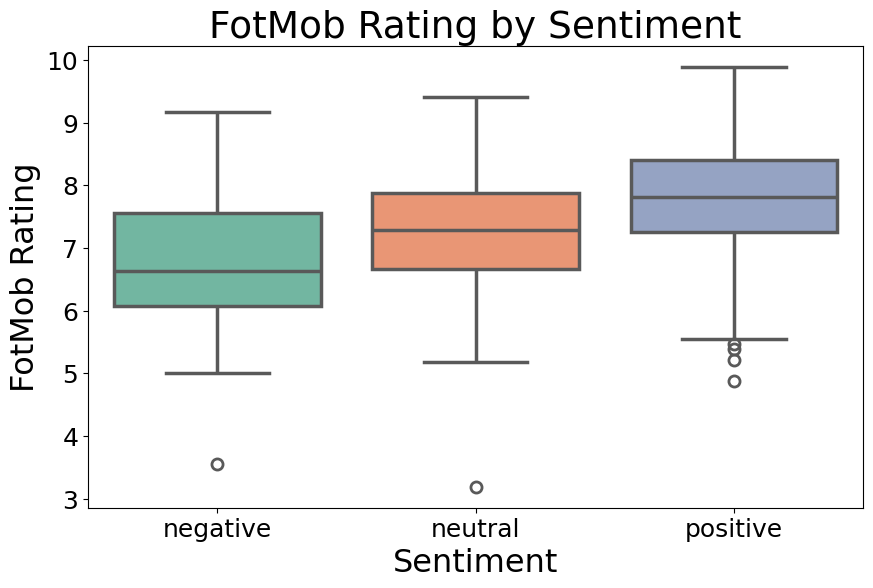

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure 'Average Sentiment' column is categorized as 'positive', 'neutral', 'negative'
final_sentiments['Average Sentiment'] = final_sentiments['Average Sentiment'].astype('category')
final_sentiments['FotMob Rating'] = pd.to_numeric(final_sentiments['FotMob Rating'], errors='coerce')

# Define outlier properties
flierprops = dict(marker='o', color='red', markersize=8, linestyle='none', markeredgewidth=2)

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=final_sentiments, x='Average Sentiment', y='FotMob Rating', palette='Set2',
            linewidth=2.5, flierprops=flierprops)

# Add titles and labels
plt.title('FotMob Rating by Sentiment', fontsize=27)
plt.xlabel('Sentiment', fontsize=23)
plt.ylabel('FotMob Rating', fontsize=23)

# Adjust tick label size
plt.tick_params(axis='both', which='major', labelsize=18)


plt.show()


In [ ]:
summary_table = (
    final_sentiments.groupby('Average Sentiment')['FotMob Rating']
    .agg(n_players='count', median='median', mean='mean')
    .reset_index()
)


print(summary_table)

  Average Sentiment  n_players  median      mean
0          negative         79    6.63  6.754051
1           neutral        313    7.28  7.268722
2          positive        220    7.81  7.767682


<ipython-input-15-29b028b3faf8>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  final_sentiments.groupby('Average Sentiment')['FotMob Rating']
